In [1]:
import matplotlib.pyplot as plt
import json
from interpret import get_interpretability_save_path
import os
from typing import Dict
import numpy as np

OPENAI_API_KEY not set, setting to fake key


/export/home/9hlehman/miniconda3/envs/hergenconda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# def get_interpretability_save_path(wandb_id):
#     return os.path.join(
#         get_interpretability_save_dir().replace("interpretability","interpretability_50"), f"interpretability_{wandb_id}.json"
#     )

def load_interpretations(wand_id) -> Dict:
    path = get_interpretability_save_path(wand_id)

    # load as josn
    with open(path) as f:
        interpretations = json.load(f)

    return interpretations


In [3]:
# layers.0
wandb_ids = [ 
    #"5h4nr1ln",
    #"jod5vurw",
    "ty1qaq98",
    "5cab0tpp",
    #"0d2kjdzt", # shear 1e-5
    #"d66z22b7", # shear unrestricted
    #"0jryjvjn", # orthogonal
    #"5s6mr9i9" # vanilla
]

interpretation_translations = {
    "5h4nr1ln" : "orthognal shear@1e-5 (layers.0)",
    "jod5vurw" : "orthogonal shear unrestircted (layers.0)",
    "ty1qaq98" : "orthogonal (layers.0)",
    "5cab0tpp" : "vanilla (layers.0)",
    "spxmzgpz" : "vanilla nuc 0.01 (layers.0) ",
    "w0otv32m" : "orthogonal shear nuc 1e-5 (layers.0)",
    "0d2kjdzt" : "orthogonal shear@1e-5 (layers.4)",
    "d66z22b7" : "orthogonal shear unrestricted (layers.4)",
    "0jryjvjn" : "orthogonal (layers.4)",
    "5s6mr9i9" : "vanilla (layers.4)",
}

interpretations = {
    wand_id: load_interpretations(wand_id)
    for wand_id in wandb_ids
}


In [4]:
# print the number of interpretations per wandb_id
for wand_id, interpretation in interpretations.items():
    print(f"Number of interpretations for {wand_id}: {len(interpretation)}")

Number of interpretations for ty1qaq98: 150
Number of interpretations for 5cab0tpp: 150


<Figure size 1000x500 with 0 Axes>

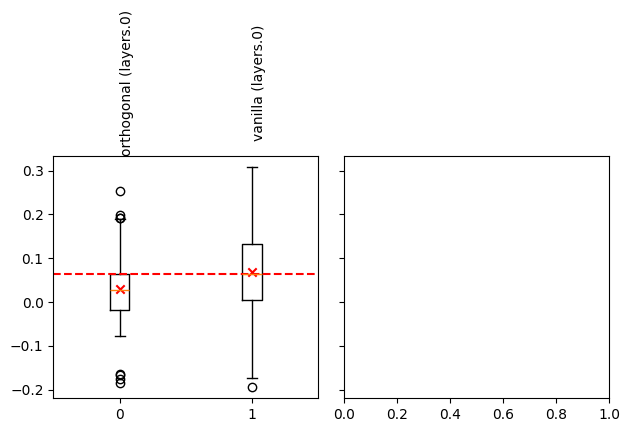

In [5]:
# plot the distirbution of score
plt.figure(figsize=(10,5))
fig, ax = plt.subplots(1,2, sharey=True)

for i, (wand_id, interpretation) in enumerate(interpretations.items()):
    ax_i = 0 if i < 4 else 1
    scores = np.array([interpretation["score"] for interpretation in interpretation])
    # plot Q1, median, Q3 etc
    ax[ax_i].boxplot(scores, positions=[i], showfliers=True)
    # name this position via interpretation_translations
    ax[ax_i].text(i, 0.5, interpretation_translations[wand_id], rotation=90, verticalalignment='center')

    # plot the mean also
    ax[ax_i].scatter(i, np.mean(scores), color='r', marker='x')
    
    if 'vanilla' in interpretation_translations[wand_id]:
        # plot a line of the median
        ax[ax_i].axhline(np.median(scores), color='r', linestyle='--')


    i+=1


plt.tight_layout()
plt.show()

## length

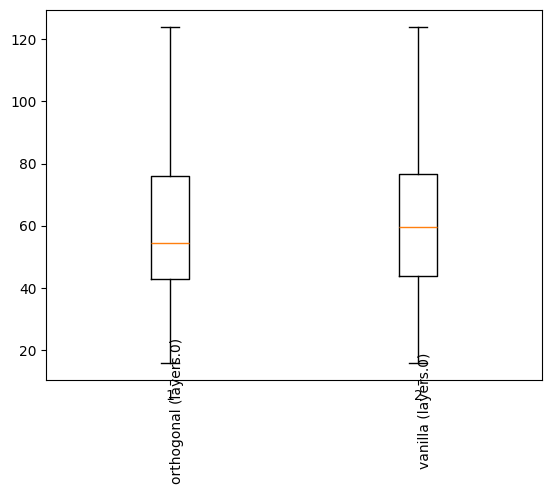

In [6]:
# oxplot of the lengths of the explainaitaions (key "explanation")
plt.figure()
i = 1
for wand_id, interpretation in interpretations.items():

    lengths = np.array([len(interpretation["explanation"]) for interpretation in interpretation])
    # plot Q1, median, Q3 etc
    plt.boxplot(lengths, positions=[i], showfliers=False)
    # name this position
    plt.text(i, 0.5, interpretation_translations[wand_id], rotation=90, verticalalignment='center')

    i+=1

plt.show()

## top k explainations

In [7]:
# for each run print the top 5 explanations
k = 5

for wand_id, interpretation in interpretations.items():
    print(f"Top {k} explanations for {interpretation_translations[wand_id]}")
    print()
    # sort the interpretations by score
    interpretations_sorted = sorted(interpretation, key=lambda x: x["score"], reverse=True)
    for i in range(k):
        print(f"{i+1}: score {interpretations_sorted[i]['score']}:")
        print(interpretations_sorted[i]["explanation"])
    
    print()
    print()
          

Top 5 explanations for orthogonal (layers.0)

1: score 0.25462166569092587:
 specific dates, names, and detailed numerical information.
2: score 0.19939059816285185:
 technical and scientific terminology, concepts, and detailed descriptions.
3: score 0.19178528182012777:
 emotionally charged or impactful words and phrases across various contexts.
4: score 0.19100550330375574:
 terms and phrases associated with medical or scientific studies, particularly involving technical and specific terminology.
5: score 0.18891036772213005:
 named entities and specific technical terms.


Top 5 explanations for vanilla (layers.0)

1: score 0.3091871840327913:
 instances of the word "change" and concepts or actions related to change or transformation.
2: score 0.3052687319063986:
numeric sequences and scientific references.
3: score 0.2963097103740545:
 terms and phrases related to scientific and technical contexts.
4: score 0.29150196932618555:
 time-related terms and durations.
5: score 0.285087015

In [8]:
# print the longest k explanations like above
k = 5
for wand_id, interpretation in interpretations.items():
    print(f"Top {k} explanations for {interpretation_translations[wand_id]}")
    print()
    # sort the interpretations by score
    interpretations_sorted = sorted(interpretation, key=lambda x: len(x["explanation"]), reverse=True)
    for i in range(k):
        print(f"{i+1}: score {interpretations_sorted[i]['score']}:")
        print(interpretations_sorted[i]["explanation"])
    
    print()
    print()

Top 5 explanations for orthogonal (layers.0)

1: score 0.010232045198030266:
technical and scientific terminology, particularly related to medical procedures, semiconductor technology, and specific scientific processes or components.
2: score 0.00472306740806712:
 significant or notable elements within a given context, such as key terms, specific numbers, or particular references in various subject areas.
3: score 0.16796160907334798:
technical and scientific terminology, including references to specific technologies, chemical processes, and medical terminology.
4: score 0.19100550330375574:
 terms and phrases associated with medical or scientific studies, particularly involving technical and specific terminology.
5: score -0.06637746203605334:
 medical and technical terms, including names of procedures, conditions, and components in medical or technical contexts.


Top 5 explanations for vanilla (layers.0)

1: score -0.06022708444437529:
 the combination of various individual specific

## len vs score

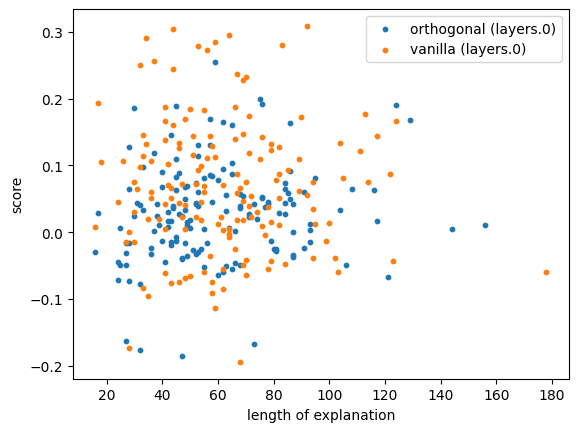

In [9]:
# plot the length of the explanations

plt.figure()

for wand_id, interpretation in interpretations.items():
    lengths = np.array([len(interpretation["explanation"]) for interpretation in interpretation])
    scores = np.array([interpretation["score"] for interpretation in interpretation])
    label = interpretation_translations[wand_id]
    plt.scatter(lengths, scores, label=label, s=10)

plt.ylabel("score")
plt.xlabel("length of explanation")

plt.legend()
plt.show()


# inter explaination sim

In [10]:
!export HF_HOME=/data2/9hlehman/.cache/huggingface
!export CUDA_DEVICE_ORDER=PCI_BUS_ID && export CUDA_VISIBLE_DEVICES=5

In [11]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')


In [12]:

def cos_sim_matrix(sentences):

    encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)
    
    # Perform pooling
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    # Normalize embeddings
    sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

    # disatnce matrix (all)
    cosine_similarity_matrix = torch.mm(sentence_embeddings, sentence_embeddings.t())
    return cosine_similarity_matrix


In [13]:
# embedd the interpretations via some model and clauclate a distance matrix

for wand_id, interpretation in interpretations.items():
    sentences = [interpretation["explanation"] for interpretation in interpretation]
    cosine_similarity_matrix = cos_sim_matrix(sentences)
    # subtract identity matrix (cos to self is 1, we want to see the rest)
    cosine_similarity_matrix = cosine_similarity_matrix - torch.eye(cosine_similarity_matrix.shape[0])

    # get the max, mean, min, median, q1, q3

    maxes = torch.max(cosine_similarity_matrix, dim=1).values
    mean_max = torch.mean(maxes)
    min_max = torch.min(maxes)
    median_max = torch.median(maxes)
    q1_max = torch.quantile(maxes, 0.25)
    q3_max = torch.quantile(maxes, 0.75)

    print(f"Max similarity for {interpretation_translations[wand_id]}")
    #print(f"max: {maxes}")
    print(f"mean: {mean_max}")
    print(f"min: {min_max}")
    print(f"median: {median_max}")
    print(f"q1: {q1_max}")
    print(f"q3: {q3_max}")
    print(f"n: {len(maxes)}")
    print()



Max similarity for orthogonal (layers.0)
mean: 0.7596673369407654
min: 0.3401297628879547
median: 0.7843739986419678
q1: 0.655636191368103
q3: 0.8818901777267456
n: 150

Max similarity for vanilla (layers.0)
mean: 0.6311466693878174
min: 0.3345414698123932
median: 0.6067323684692383
q1: 0.5063837766647339
q3: 0.747331440448761
n: 150

